In [1]:
import torch
import numpy as np
import os
import matplotlib.pyplot as plt
from dataset import *

# Helper functions and variable definitions

In [2]:
widths = [32, 64, 128, 256, 512, 1024, 2048]
activations = ["relu", "elu", "gelu", "leaky-relu", "step", "quadratic", "sigmoid"]
inits = ["gaussian", "uniform"]
data_types = ["uos", "mog"]
angles=[15, 30, 45, 60, 75, 90]

In [3]:
activations_save = {
    "relu": "ReLU",
    "elu": "ELU",
    "gelu": "GELU",
    "leaky-relu": "Leaky ReLU",
    "step": "Step",
    "quadratic": "Quadratic",
    "sigmoid": "Sigmoid"
}

data_types_save = {
    "uos": "Union of Subspaces",
    "mog": "Mixture of Gaussians"
}

# Plot training and test accuracies vs. width

## Accuracy vs. width for different activation functions

In [4]:
# Load in saved results
train_accs_act = np.zeros((len(widths), len(activations)))
test_accs_act = np.zeros((len(widths), len(activations)))

for (i, width) in enumerate(widths):
    for (j, activation) in enumerate(activations):
        results_dir = "save/hybrid/activations/width_" + str(width) + "_depth_2_nonlinear_depth_1_gaussian_init_uos_data_5_classes_rank_4_angle_0_" + activation + "_activation_seed_0"
        train_best_result = torch.load(os.path.join(results_dir, "best.pth"), map_location=torch.device('cpu'))
        test_result = torch.load(os.path.join(results_dir, "test.pth"), map_location=torch.device('cpu'))
        
        cur_train_accs = train_best_result['train_accuracies']
        train_accs_act[i, j] = cur_train_accs[-1]
        
        test_accs_act[i, j] = test_result['test_accuracy']

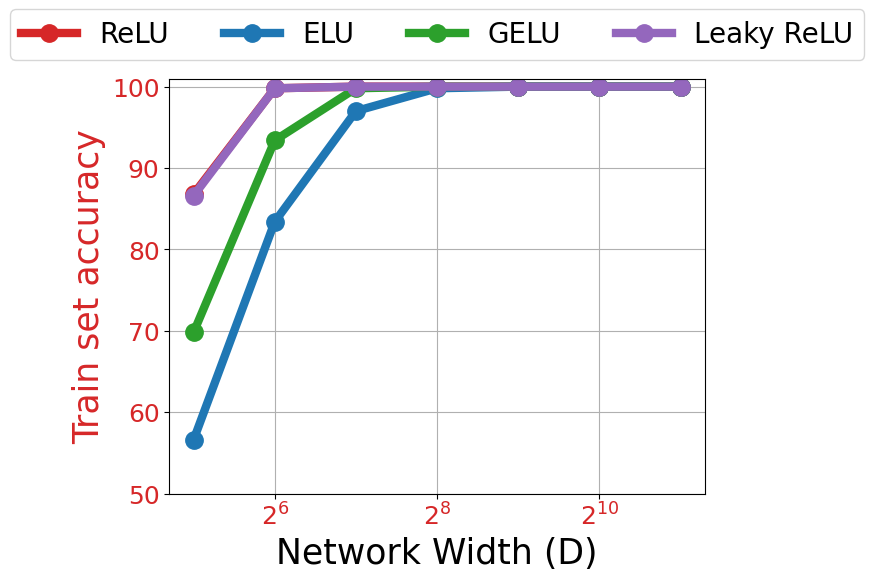

In [5]:
# Plot results
fig, ax1 = plt.subplots(figsize=(8,6))

start_idx = 1
lw = 6
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:purple'] 
ax1.set_xlabel(r'Network Width (D)', fontsize=25)
ax1.set_ylabel('Train set accuracy', color='tab:red', fontsize=25)

lns = []
for i in range(len(colors)):
    l_i = ax1.plot(widths, list(train_accs_act[:, i]), color=colors[i], linewidth=lw, marker=".", markersize=25,
                  label=activations_save[activations[i]])
    lns += l_i

ax1.set_xscale('log', base=2)
ax1.tick_params(axis='y', labelcolor='tab:red', labelsize=18)
ax1.tick_params(axis='x', labelcolor='tab:red', labelsize=18)
#lns = l2+l3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.20),
           ncols=4, fontsize=20)
plt.grid()
ax1.set_ylim(50, 101)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

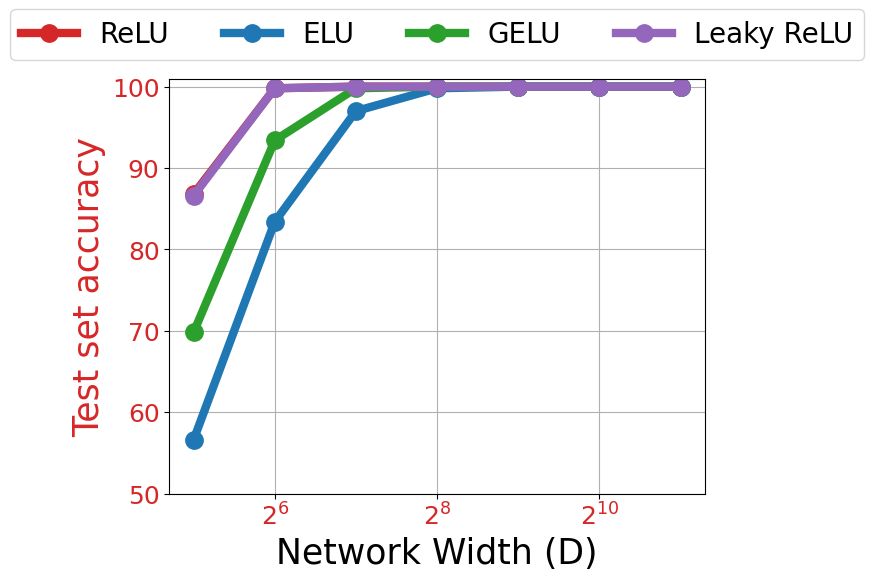

In [6]:
# Plot results
fig, ax1 = plt.subplots(figsize=(8,6))

start_idx = 1
lw = 6
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:purple'] 
ax1.set_xlabel(r'Network Width (D)', fontsize=25)
ax1.set_ylabel('Test set accuracy', color='tab:red', fontsize=25)

lns = []
for i in range(len(colors)):
    l_i = ax1.plot(widths, list(test_accs_act[:, i]), color=colors[i], linewidth=lw, marker=".", markersize=25,
                  label=activations_save[activations[i]])
    lns += l_i

ax1.set_xscale('log', base=2)
ax1.tick_params(axis='y', labelcolor='tab:red', labelsize=18)
ax1.tick_params(axis='x', labelcolor='tab:red', labelsize=18)
#lns = l2+l3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.20),
           ncols=4, fontsize=20)
plt.grid()
ax1.set_ylim(50, 101)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

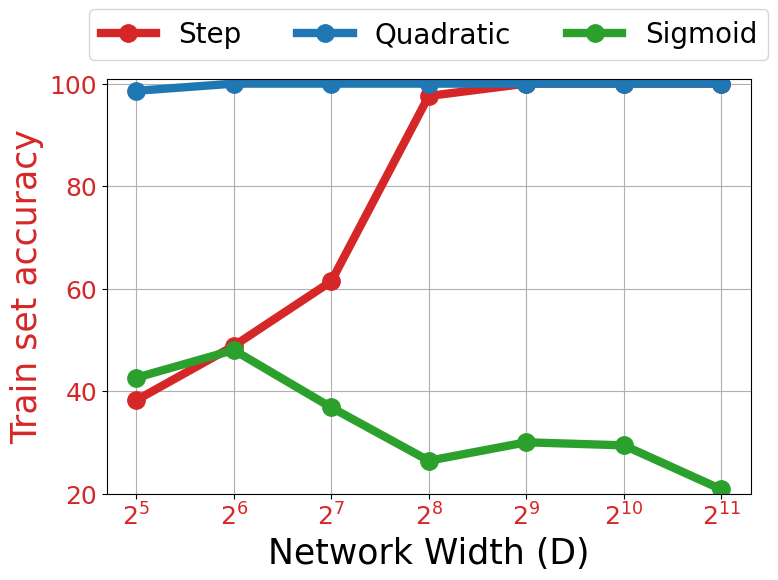

In [7]:
# Plot results
fig, ax1 = plt.subplots(figsize=(8,6))

start_idx = 1
lw = 6
colors = ['tab:red', 'tab:blue', 'tab:green'] 
ax1.set_xlabel(r'Network Width (D)', fontsize=25)
ax1.set_ylabel('Train set accuracy', color='tab:red', fontsize=25)

lns = []
for i in range(len(colors)):
    idx = i + len(colors) + 1
    l_i = ax1.plot(widths, list(train_accs_act[:, idx]), color=colors[i], linewidth=lw, marker=".", markersize=25,
                   label=activations_save[activations[idx]])
    lns += l_i

ax1.set_xscale('log', base=2)
ax1.tick_params(axis='y', labelcolor='tab:red', labelsize=18)
ax1.tick_params(axis='x', labelcolor='tab:red', labelsize=18)
#lns = l2+l3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.20),
           ncols=3, fontsize=20)
plt.grid()
ax1.set_ylim(20, 101)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

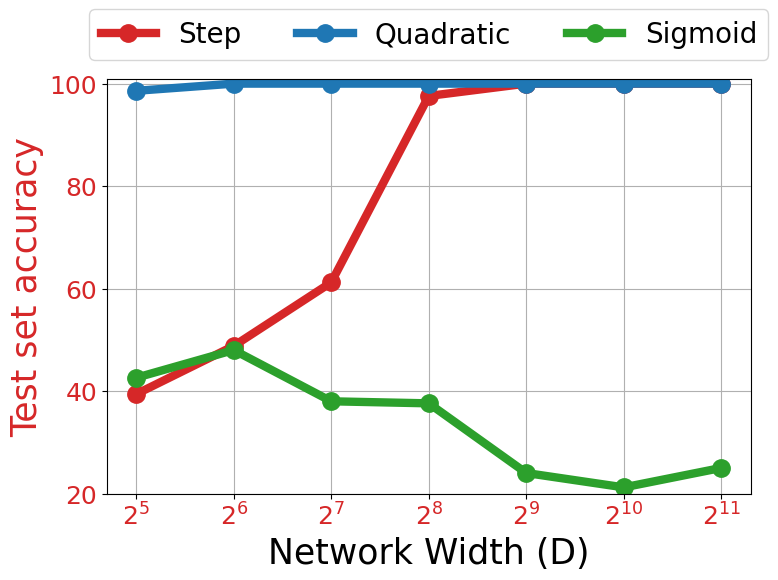

In [8]:
# Plot results
fig, ax1 = plt.subplots(figsize=(8,6))

start_idx = 1
lw = 6
colors = ['tab:red', 'tab:blue', 'tab:green'] 
ax1.set_xlabel(r'Network Width (D)', fontsize=25)
ax1.set_ylabel('Test set accuracy', color='tab:red', fontsize=25)

lns = []
for i in range(len(colors)):
    idx = i + len(colors) + 1
    l_i = ax1.plot(widths, list(test_accs_act[:, idx]), color=colors[i], linewidth=lw, marker=".", markersize=25,
                   label=activations_save[activations[idx]])
    lns += l_i

ax1.set_xscale('log', base=2)
ax1.tick_params(axis='y', labelcolor='tab:red', labelsize=18)
ax1.tick_params(axis='x', labelcolor='tab:red', labelsize=18)
#lns = l2+l3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.20),
           ncols=3, fontsize=20)
plt.grid()
ax1.set_ylim(20, 101)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Accuracy vs. width for different initializations

In [9]:
# Load in saved results
train_accs_init = np.zeros((len(widths), len(inits)))
test_accs_init = np.zeros((len(widths), len(inits)))

for (i, width) in enumerate(widths):
    for (j, init) in enumerate(inits):
        results_dir = "save/hybrid/inits/width_" + str(width) + "_depth_2_nonlinear_depth_1_" + init + "_init_uos_data_5_classes_rank_4_angle_0_relu_activation_seed_0"
        train_best_result = torch.load(os.path.join(results_dir, "best.pth"), map_location=torch.device('cpu'))
        test_result = torch.load(os.path.join(results_dir, "test.pth"), map_location=torch.device('cpu'))
        
        cur_train_accs = train_best_result['train_accuracies']
        train_accs_init[i, j] = cur_train_accs[-1]
        
        test_accs_init[i, j] = test_result['test_accuracy']

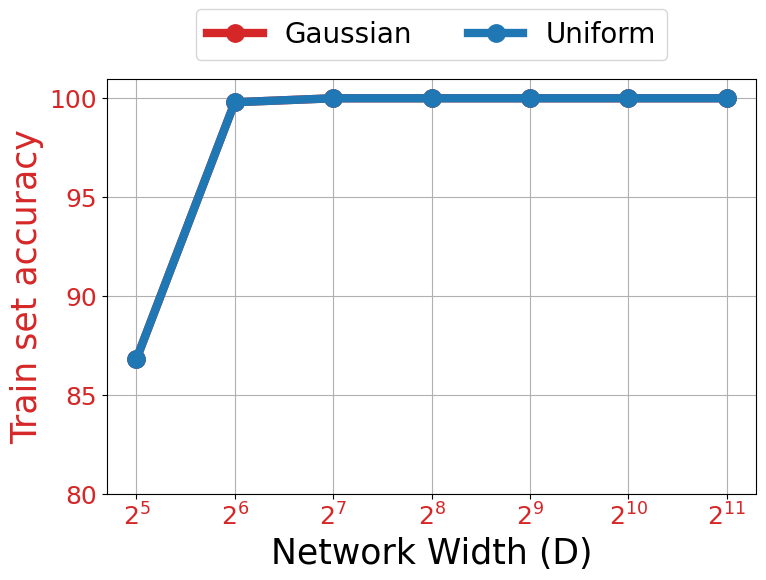

In [10]:
# Plot results
fig, ax1 = plt.subplots(figsize=(8,6))

start_idx = 1
lw = 6
colors = ['tab:red', 'tab:blue'] 
ax1.set_xlabel(r'Network Width (D)', fontsize=25)
ax1.set_ylabel('Train set accuracy', color='tab:red', fontsize=25)

lns = []
for i in range(len(colors)):
    l_i = ax1.plot(widths, list(train_accs_init[:, i]), color=colors[i], linewidth=lw, marker=".", markersize=25,
                  label=inits[i].capitalize())
    lns += l_i

ax1.set_xscale('log', base=2)
ax1.tick_params(axis='y', labelcolor='tab:red', labelsize=18)
ax1.tick_params(axis='x', labelcolor='tab:red', labelsize=18)
#lns = l2+l3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.20),
           ncols=2, fontsize=20)
plt.grid()
ax1.set_ylim(80, 101)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

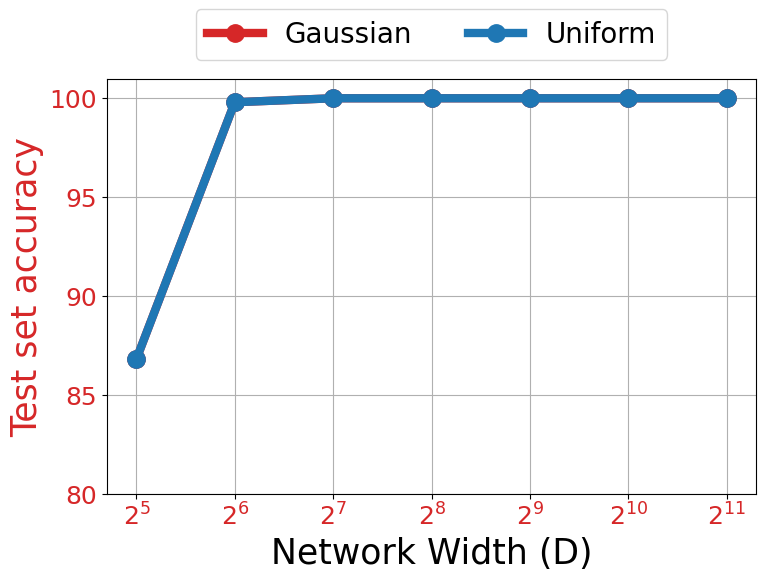

In [11]:
# Plot results
fig, ax1 = plt.subplots(figsize=(8,6))

start_idx = 1
lw = 6
colors = ['tab:red', 'tab:blue'] 
ax1.set_xlabel(r'Network Width (D)', fontsize=25)
ax1.set_ylabel('Test set accuracy', color='tab:red', fontsize=25)

lns = []
for i in range(len(colors)):
    l_i = ax1.plot(widths, list(test_accs_init[:, i]), color=colors[i], linewidth=lw, marker=".", markersize=25,
                  label=inits[i].capitalize())
    lns += l_i

ax1.set_xscale('log', base=2)
ax1.tick_params(axis='y', labelcolor='tab:red', labelsize=18)
ax1.tick_params(axis='x', labelcolor='tab:red', labelsize=18)
#lns = l2+l3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.20),
           ncols=2, fontsize=20)
plt.grid()
ax1.set_ylim(80, 101)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Accuracy vs. width for different data types

In [12]:
# Load in saved results
train_accs_data = np.zeros((len(widths), len(data_types)))
test_accs_data = np.zeros((len(widths), len(data_types)))

for (i, width) in enumerate(widths):
    for (j, data_type) in enumerate(data_types):
        if data_type == "uos":
            results_dir = "save/hybrid/data_types/width_" + str(width) + "_depth_2_nonlinear_depth_1_gaussian_init_uos_data_5_classes_rank_4_angle_0_relu_activation_seed_0"
        elif data_type == "mog":
            results_dir = "save/hybrid/data_types/width_" + str(width) + "_depth_2_nonlinear_depth_1_gaussian_init_mog_data_5_classes_relu_activation_seed_0"
        
        train_best_result = torch.load(os.path.join(results_dir, "best.pth"), map_location=torch.device('cpu'))
        test_result = torch.load(os.path.join(results_dir, "test.pth"), map_location=torch.device('cpu'))
        
        cur_train_accs = train_best_result['train_accuracies']
        train_accs_data[i, j] = cur_train_accs[-1]
        
        test_accs_data[i, j] = test_result['test_accuracy']

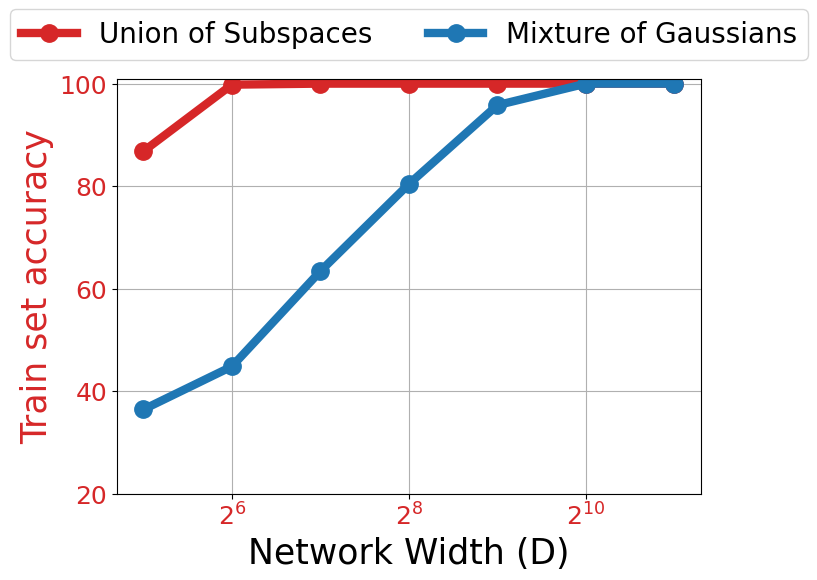

In [13]:
# Plot results
fig, ax1 = plt.subplots(figsize=(8,6))

start_idx = 1
lw = 6
colors = ['tab:red', 'tab:blue'] 
ax1.set_xlabel(r'Network Width (D)', fontsize=25)
ax1.set_ylabel('Train set accuracy', color='tab:red', fontsize=25)

lns = []
for i in range(len(colors)):
    l_i = ax1.plot(widths, list(train_accs_data[:, i]), color=colors[i], linewidth=lw, marker=".", markersize=25,
                  label=data_types_save[data_types[i]])
    lns += l_i

ax1.set_xscale('log', base=2)
ax1.tick_params(axis='y', labelcolor='tab:red', labelsize=18)
ax1.tick_params(axis='x', labelcolor='tab:red', labelsize=18)
#lns = l2+l3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.20),
           ncols=2, fontsize=20)
plt.grid()
ax1.set_ylim(20, 101)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

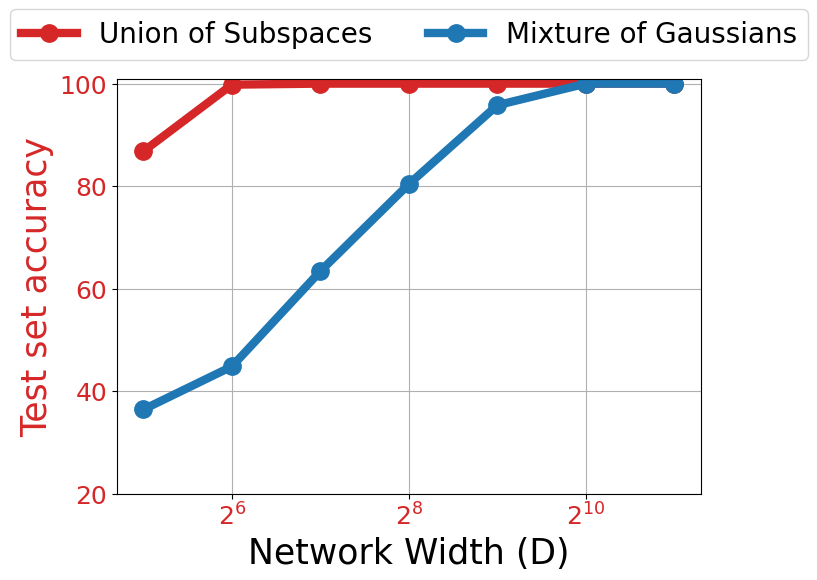

In [14]:
# Plot results
fig, ax1 = plt.subplots(figsize=(8,6))

start_idx = 1
lw = 6
colors = ['tab:red', 'tab:blue'] 
ax1.set_xlabel(r'Network Width (D)', fontsize=25)
ax1.set_ylabel('Test set accuracy', color='tab:red', fontsize=25)

lns = []
for i in range(len(colors)):
    l_i = ax1.plot(widths, list(test_accs_data[:, i]), color=colors[i], linewidth=lw, marker=".", markersize=25,
                  label=data_types_save[data_types[i]])
    lns += l_i

ax1.set_xscale('log', base=2)
ax1.tick_params(axis='y', labelcolor='tab:red', labelsize=18)
ax1.tick_params(axis='x', labelcolor='tab:red', labelsize=18)
#lns = l2+l3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.20),
           ncols=2, fontsize=20)
plt.grid()
ax1.set_ylim(20, 101)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Accuracy vs. width for different principal angles between subspaces

In [15]:
# Load in saved results
train_accs_angles = np.zeros((len(widths), len(angles)))
test_accs_angles = np.zeros((len(widths), len(angles)))

for (i, width) in enumerate(widths):
    for (j, angle) in enumerate(angles):
        results_dir = "save/hybrid/angles/width_" + str(width) + "_depth_2_nonlinear_depth_1_gaussian_init_uos_data_6_classes_rank_4_angle_" + str(angle) + "_quadratic_activation_seed_0"
        train_best_result = torch.load(os.path.join(results_dir, "best.pth"), map_location=torch.device('cpu'))
        test_result = torch.load(os.path.join(results_dir, "test.pth"), map_location=torch.device('cpu'))
        
        cur_train_accs = train_best_result['train_accuracies']
        train_accs_angles[i, j] = cur_train_accs[-1]
        
        test_accs_angles[i, j] = test_result['test_accuracy']

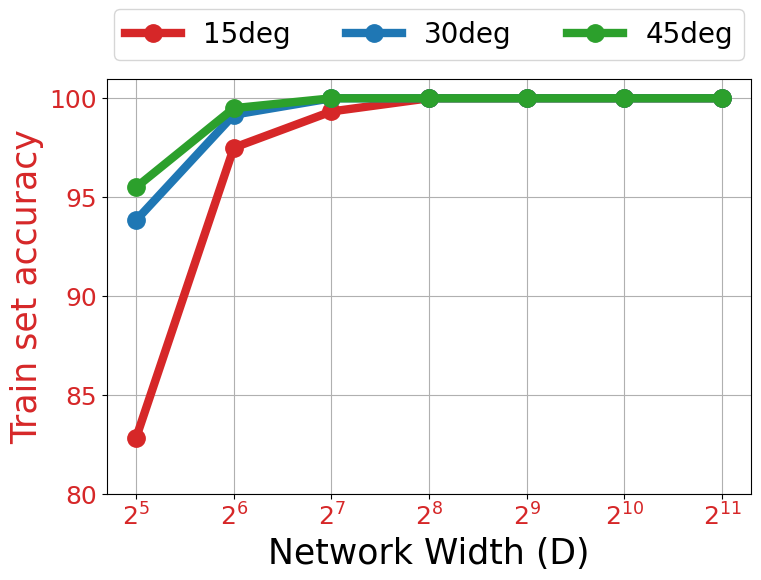

In [16]:
# Plot results
fig, ax1 = plt.subplots(figsize=(8,6))

start_idx = 1
lw = 6
colors = ['tab:red', 'tab:blue', 'tab:green'] #, 'tab:purple', 'tab:gray', 'tab:orange'] 
ax1.set_xlabel(r'Network Width (D)', fontsize=25)
ax1.set_ylabel('Train set accuracy', color='tab:red', fontsize=25)

lns = []
for i in range(len(colors)):
    l_i = ax1.plot(widths, list(train_accs_angles[:, i]), color=colors[i], linewidth=lw, marker=".", markersize=25,
                  label=str(angles[i]) + "deg")
    lns += l_i

ax1.set_xscale('log', base=2)
ax1.tick_params(axis='y', labelcolor='tab:red', labelsize=18)
ax1.tick_params(axis='x', labelcolor='tab:red', labelsize=18)
#lns = l2+l3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.20),
           ncols=3, fontsize=20)
plt.grid()
ax1.set_ylim(80, 101)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

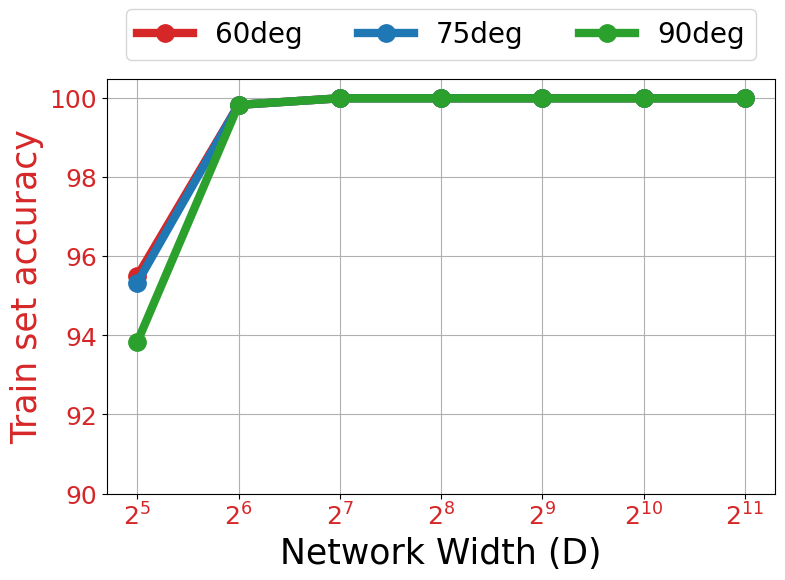

In [17]:
# Plot results
fig, ax1 = plt.subplots(figsize=(8,6))

start_idx = 1
lw = 6
colors = ['tab:red', 'tab:blue', 'tab:green'] #, 'tab:purple', 'tab:gray', 'tab:orange'] 
ax1.set_xlabel(r'Network Width (D)', fontsize=25)
ax1.set_ylabel('Train set accuracy', color='tab:red', fontsize=25)

lns = []
for i in range(len(colors)):
    l_i = ax1.plot(widths, list(train_accs_angles[:, i+3]), color=colors[i], linewidth=lw, marker=".", markersize=25,
                  label=str(angles[i+3]) + "deg")
    lns += l_i

ax1.set_xscale('log', base=2)
ax1.tick_params(axis='y', labelcolor='tab:red', labelsize=18)
ax1.tick_params(axis='x', labelcolor='tab:red', labelsize=18)
#lns = l2+l3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.20),
           ncols=3, fontsize=20)
plt.grid()
ax1.set_ylim(90, 100.5)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

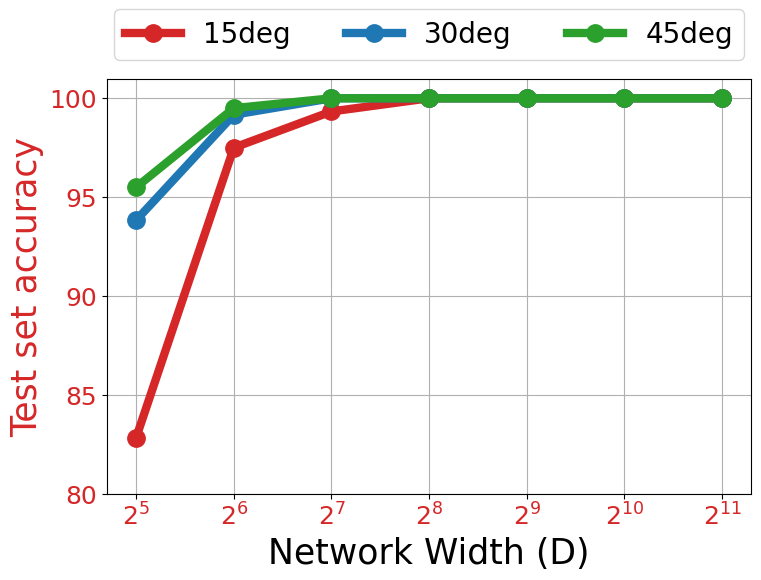

In [18]:
# Plot results
fig, ax1 = plt.subplots(figsize=(8,6))

start_idx = 1
lw = 6
colors = ['tab:red', 'tab:blue', 'tab:green'] #, 'tab:purple', 'tab:gray', 'tab:orange'] 
ax1.set_xlabel(r'Network Width (D)', fontsize=25)
ax1.set_ylabel('Test set accuracy', color='tab:red', fontsize=25)

lns = []
for i in range(len(colors)):
    l_i = ax1.plot(widths, list(test_accs_angles[:, i]), color=colors[i], linewidth=lw, marker=".", markersize=25,
                  label=str(angles[i]) + "deg")
    lns += l_i

ax1.set_xscale('log', base=2)
ax1.tick_params(axis='y', labelcolor='tab:red', labelsize=18)
ax1.tick_params(axis='x', labelcolor='tab:red', labelsize=18)
#lns = l2+l3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.20),
           ncols=3, fontsize=20)
plt.grid()
ax1.set_ylim(80, 101)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

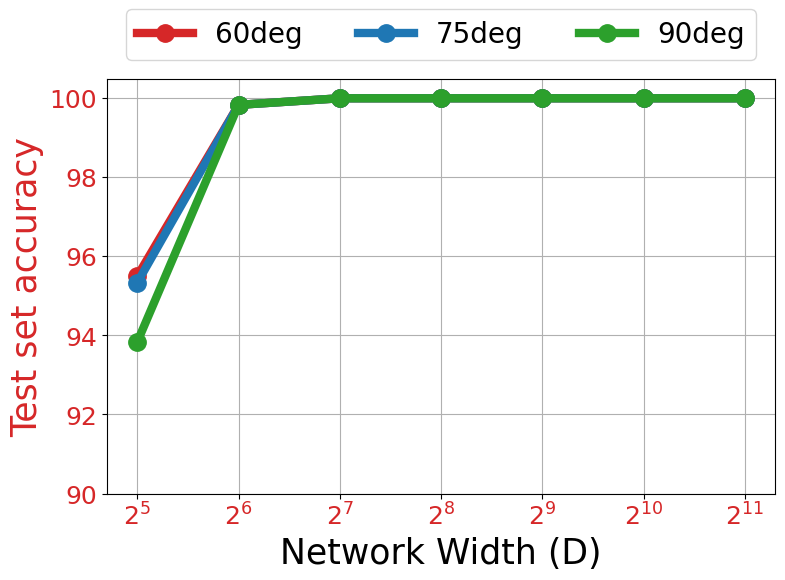

In [19]:
# Plot results
fig, ax1 = plt.subplots(figsize=(8,6))

start_idx = 1
lw = 6
colors = ['tab:red', 'tab:blue', 'tab:green'] #, 'tab:purple', 'tab:gray', 'tab:orange'] 
ax1.set_xlabel(r'Network Width (D)', fontsize=25)
ax1.set_ylabel('Test set accuracy', color='tab:red', fontsize=25)

lns = []
for i in range(len(colors)):
    l_i = ax1.plot(widths, list(test_accs_angles[:, i+3]), color=colors[i], linewidth=lw, marker=".", markersize=25,
                  label=str(angles[i+3]) + "deg")
    lns += l_i

ax1.set_xscale('log', base=2)
ax1.tick_params(axis='y', labelcolor='tab:red', labelsize=18)
ax1.tick_params(axis='x', labelcolor='tab:red', labelsize=18)
#lns = l2+l3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.20),
           ncols=3, fontsize=20)
plt.grid()
ax1.set_ylim(90, 100.5)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [20]:
# Load in saved results
widths = [16, 32, 48, 64, 80, 96, 112, 128]
train_accs_angles = np.zeros((len(widths), len(angles)))
test_accs_angles = np.zeros((len(widths), len(angles)))

for (i, width) in enumerate(widths):
    for (j, angle) in enumerate(angles):
        results_dir = "save/hybrid/angles/width_" + str(width) + "_depth_2_nonlinear_depth_1_gaussian_init_uos_data_2_classes_rank_4_angle_" + str(angle) + "_quadratic_activation_seed_0"
        train_best_result = torch.load(os.path.join(results_dir, "best.pth"), map_location=torch.device('cpu'))
        test_result = torch.load(os.path.join(results_dir, "test.pth"), map_location=torch.device('cpu'))
        
        cur_train_accs = train_best_result['train_accuracies']
        train_accs_angles[i, j] = cur_train_accs[-1]
        
        test_accs_angles[i, j] = test_result['test_accuracy']

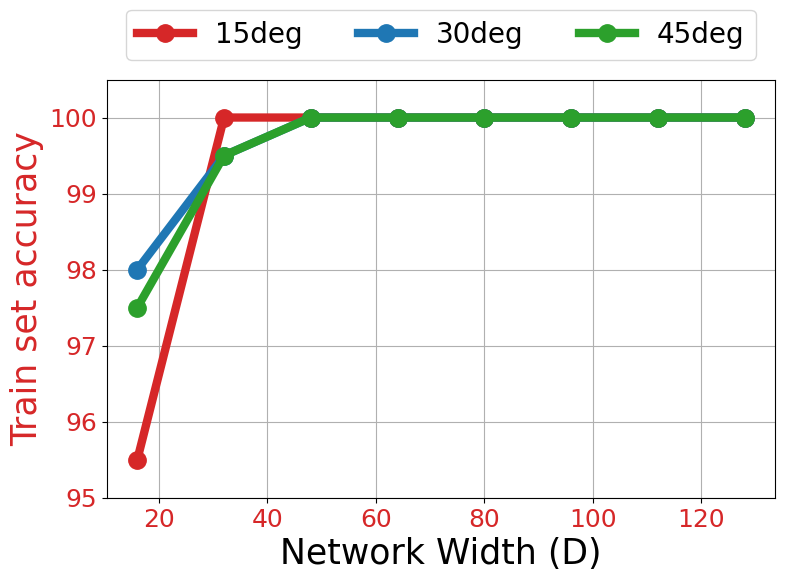

In [21]:
# Plot results
fig, ax1 = plt.subplots(figsize=(8,6))

start_idx = 1
lw = 6
colors = ['tab:red', 'tab:blue', 'tab:green'] #, 'tab:purple', 'tab:gray', 'tab:orange'] 
ax1.set_xlabel(r'Network Width (D)', fontsize=25)
ax1.set_ylabel('Train set accuracy', color='tab:red', fontsize=25)

lns = []
for i in range(len(colors)):
    l_i = ax1.plot(widths, list(train_accs_angles[:, i]), color=colors[i], linewidth=lw, marker=".", markersize=25,
                  label=str(angles[i]) + "deg")
    lns += l_i

#ax1.set_xscale('log', base=2)
ax1.tick_params(axis='y', labelcolor='tab:red', labelsize=18)
ax1.tick_params(axis='x', labelcolor='tab:red', labelsize=18)
#lns = l2+l3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.20),
           ncols=3, fontsize=20)
plt.grid()
ax1.set_ylim(95, 100.5)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

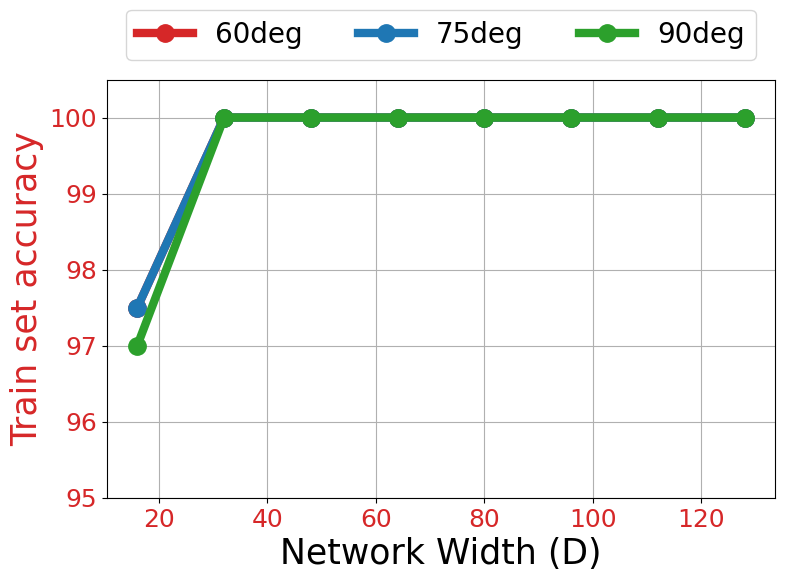

In [22]:
# Plot results
fig, ax1 = plt.subplots(figsize=(8,6))

start_idx = 1
lw = 6
colors = ['tab:red', 'tab:blue', 'tab:green'] #, 'tab:purple', 'tab:gray', 'tab:orange'] 
ax1.set_xlabel(r'Network Width (D)', fontsize=25)
ax1.set_ylabel('Train set accuracy', color='tab:red', fontsize=25)

lns = []
for i in range(len(colors)):
    l_i = ax1.plot(widths, list(train_accs_angles[:, i+3]), color=colors[i], linewidth=lw, marker=".", markersize=25,
                  label=str(angles[i+3]) + "deg")
    lns += l_i

#ax1.set_xscale('log', base=2)
ax1.tick_params(axis='y', labelcolor='tab:red', labelsize=18)
ax1.tick_params(axis='x', labelcolor='tab:red', labelsize=18)
#lns = l2+l3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.20),
           ncols=3, fontsize=20)
plt.grid()
ax1.set_ylim(95, 100.5)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

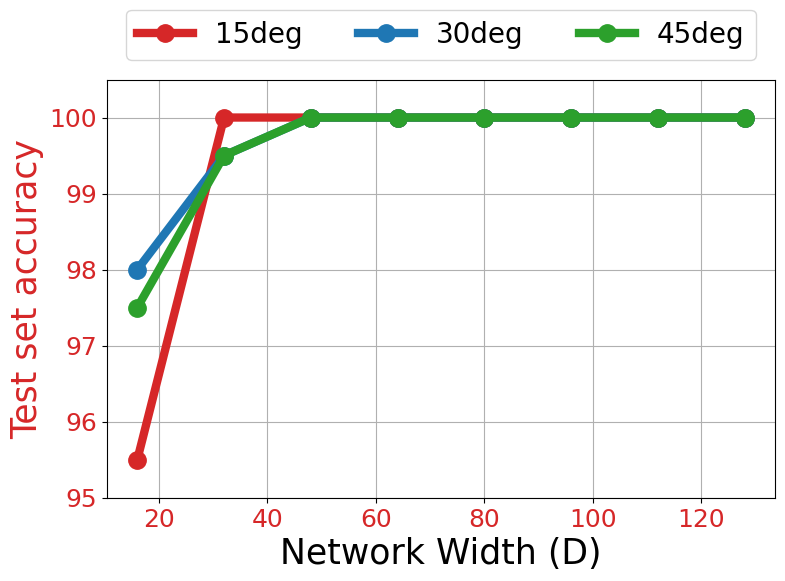

In [23]:
# Plot results
fig, ax1 = plt.subplots(figsize=(8,6))

start_idx = 1
lw = 6
colors = ['tab:red', 'tab:blue', 'tab:green'] #, 'tab:purple', 'tab:gray', 'tab:orange'] 
ax1.set_xlabel(r'Network Width (D)', fontsize=25)
ax1.set_ylabel('Test set accuracy', color='tab:red', fontsize=25)

lns = []
for i in range(len(colors)):
    l_i = ax1.plot(widths, list(test_accs_angles[:, i]), color=colors[i], linewidth=lw, marker=".", markersize=25,
                  label=str(angles[i]) + "deg")
    lns += l_i

#ax1.set_xscale('log', base=2)
ax1.tick_params(axis='y', labelcolor='tab:red', labelsize=18)
ax1.tick_params(axis='x', labelcolor='tab:red', labelsize=18)
#lns = l2+l3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.20),
           ncols=3, fontsize=20)
plt.grid()
ax1.set_ylim(95, 100.5)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

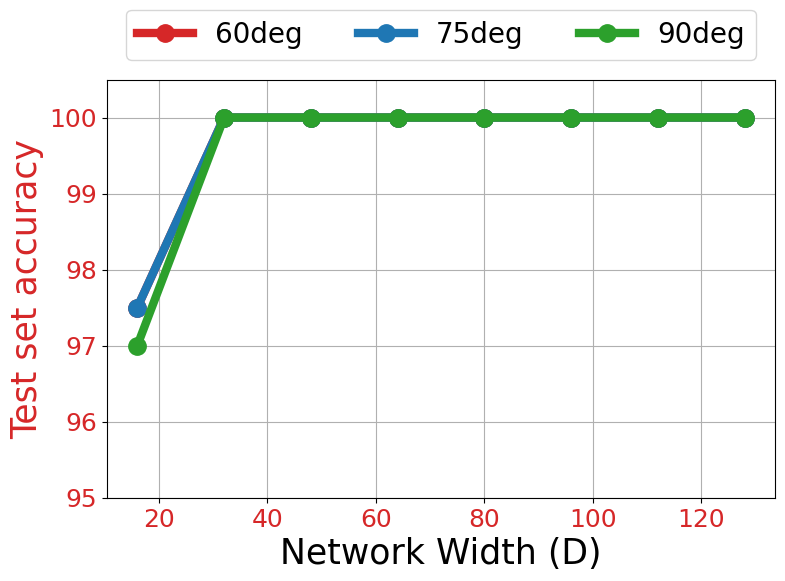

In [24]:
# Plot results
fig, ax1 = plt.subplots(figsize=(8,6))

start_idx = 1
lw = 6
colors = ['tab:red', 'tab:blue', 'tab:green'] #, 'tab:purple', 'tab:gray', 'tab:orange'] 
ax1.set_xlabel(r'Network Width (D)', fontsize=25)
ax1.set_ylabel('Test set accuracy', color='tab:red', fontsize=25)

lns = []
for i in range(len(colors)):
    l_i = ax1.plot(widths, list(test_accs_angles[:, i+3]), color=colors[i], linewidth=lw, marker=".", markersize=25,
                  label=str(angles[i+3]) + "deg")
    lns += l_i

#ax1.set_xscale('log', base=2)
ax1.tick_params(axis='y', labelcolor='tab:red', labelsize=18)
ax1.tick_params(axis='x', labelcolor='tab:red', labelsize=18)
#lns = l2+l3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.20),
           ncols=3, fontsize=20)
plt.grid()
ax1.set_ylim(95, 100.5)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()